## MACHINE LEARNING PROJECT - PREDICTION ON CLIENT SUBSCRIPTION TO A TERM DEPOSIT

Author: Sylvanus Quaye

## BUSINESS UNDERSTANDING
Train a machine learning model to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"). I will focus on building a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset. 

### Importation of all necessary packages

In [1]:
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
warnings.filterwarnings("ignore")

### Read Data

In [11]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, header=None)

# Display the first few rows to understand its structure
data.head()


,0
0,"age;""job"";""marital"";""education"";""default"";""hou..."
1,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
2,"57;""services"";""married"";""high.school"";""unknown..."
3,"37;""services"";""married"";""high.school"";""no"";""ye..."
4,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."


In [12]:

# Load the data with proper delimiters and quotes
file_path = 'bank-additional-full.csv'  # Replace with your file path
data = pd.read_csv(file_path, delimiter=';', quotechar='"')

# Preview the data
print(data.head())
print(data.info())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [13]:
print(data.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


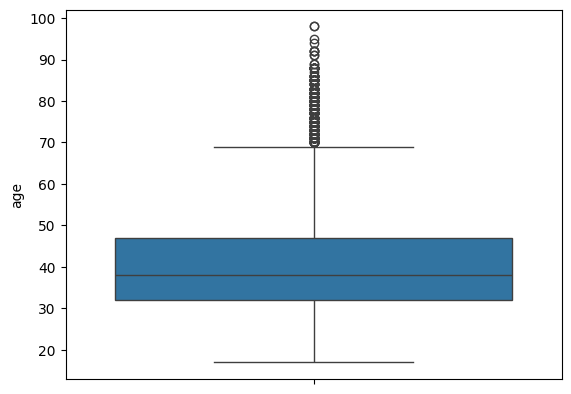

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['age'])
plt.show()


In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
# Saving the dataframe
data.to_csv('bank-additional-full.csv', index=False)

### Perform a `brief` EDA  (info(), describe(), corr() etc)

#### Descriptive Statistics

In [20]:
# Generate descriptive statistics of the DataFrame 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [21]:
# Generate descriptive statistics for categorical columns in the DataFrame 
data.describe(include="object").T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [23]:
# Retrieve the unique values present in the "Customer Gender" column of the DataFrame
data["y"].unique()

array(['no', 'yes'], dtype=object)

#### Missing and Duplicated Values

In [27]:
# Check for total missing values in each column of the DataFrame
missing_values = data.isnull().sum()
print()
print("Missing values in each column:")
print()
print(missing_values)
print()

# Check for total duplicated rows in the DataFrame
duplicate_count = data.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()

# Select rows where values in "Column1" are not null and display the first few rows
data[~data["age"].isnull()].head()


Missing values in each column:

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Number of duplicated rows: 12



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## DATA PREPARATION
^ Data Cleaning

In [26]:
# Find duplicate rows
duplicates = data[data.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Preview the duplicate rows (optional)
print(duplicates)


Number of duplicate rows: 12
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71 

In [29]:
# Count the number of missing values in each row of the DataFrame
missing_values_per_row = data.isnull().sum(axis=1)

# Print the results
print()
print("Number of missing values per row:")
print()
print(missing_values_per_row)
print()

# Select rows where the count of missing values is greater than 1
data[data.isnull().sum(axis=1) > 1]


Number of missing values per row:

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Length: 41188, dtype: int64



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [28]:
data.to_csv('cleaned_data.csv', index=False)


In [30]:
# Display information about the DataFrame with memory usage
print()
print("DataFrame Info with Memory Usage:")
print()
print(data.info(memory_usage="deep"))
print()

# Display the shape of the DataFrame
print("DataFrame Shape:", data.shape)
print()

# Display the first few rows of the DataFrame
data.head()


DataFrame Info with Memory Usage:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
category_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                    'contact', 'month', 'day_of_week', 'poutcome', 'y']
data[category_columns] = data[category_columns].astype('category')


In [ ]:
#convert month into a datetime-compatible format
data['month'] = pd.to_datetime(data['month'], format='%b', errors='coerce') 


In [ ]:
# converting target column to numeric column  simplify modeling.
data['y'] = data['y'].map({'yes': 1, 'no': 0})


In [33]:
# Check memory usage after adjustments
print(data.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

Rename Columns to Enhance Understanding

In [34]:
data = data.rename(columns={
    'marital': 'marital_status',
    'education': 'education_level',
    'default': 'has_default',
    'housing': 'has_housing_loan',
    'loan': 'has_personal_loan',
    'contact': 'contact_type',
    'month': 'contact_month',
    'day_of_week': 'contact_day',
    'duration': 'call_duration',
    'campaign': 'number_of_contacts',
    'pdays': 'days_since_last_contact',
    'previous': 'previous_contacts',
    'poutcome': 'previous_outcome',
    'emp.var.rate': 'employment_variation_rate',
    'cons.price.idx': 'consumer_price_index',
    'cons.conf.idx': 'consumer_confidence_index',
    'euribor3m': 'euribor_3_month_rate',
    'nr.employed': 'number_of_employees',
    'y': 'term_deposit_subscribed'
})


In [35]:
#Confirm new column names

print(data.columns)


Index(['age', 'job', 'marital_status', 'education_level', 'has_default',
       'has_housing_loan', 'has_personal_loan', 'contact_type',
       'contact_month', 'contact_day', 'call_duration', 'number_of_contacts',
       'days_since_last_contact', 'previous_contacts', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3_month_rate',
       'number_of_employees', 'term_deposit_subscribed'],
      dtype='object')


In [36]:
data.head(10)

,age,job,marital_status,education_level,has_default,has_housing_loan,has_personal_loan,contact_type,contact_month,contact_day,call_duration,number_of_contacts,days_since_last_contact,previous_contacts,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_month_rate,number_of_employees,term_deposit_subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,1900-05-01,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,1900-05-01,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,1900-05-01,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,1900-05-01,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,1900-05-01,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,1900-05-01,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,1900-05-01,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,1900-05-01,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,1900-05-01,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,1900-05-01,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


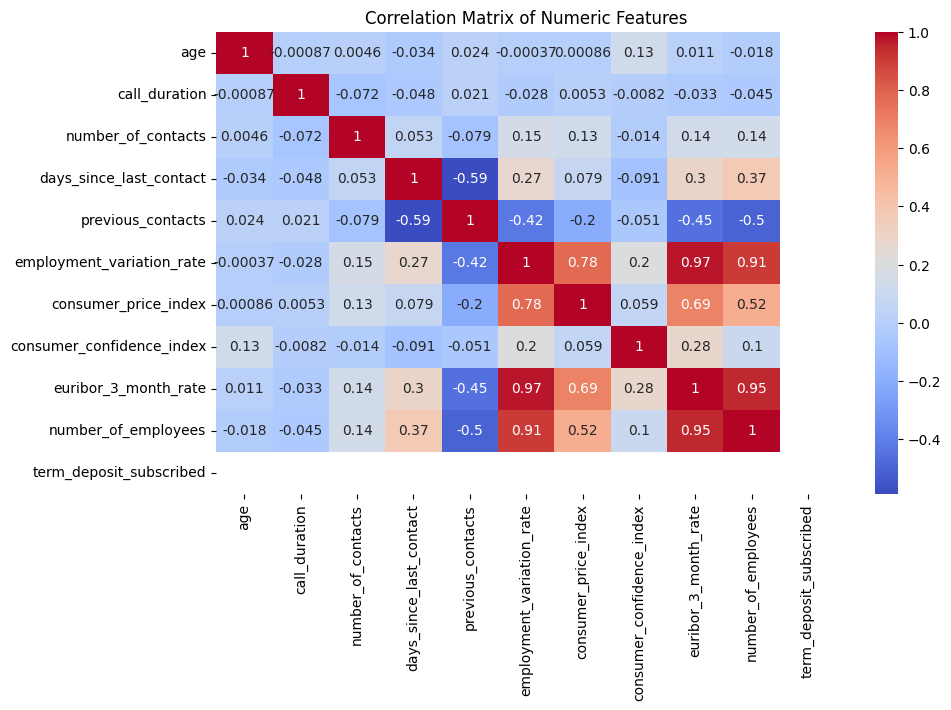

In [38]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize correlation with the target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


## Key Points from the Correlation Matrix
1. Diagonal Correlations (=1):

The diagonal elements of the matrix (all equal to 1) represent the correlation of a feature with itself, which is always perfect.

2. Correlation Strength:

High correlation (close to +1 or -1): Indicates a strong linear relationship between features.
Moderate correlation (around ±0.5): Indicates some degree of linear relationship.
Low correlation (close to 0): Indicates no linear relationship.

3. Features with Strong Correlations:

number_of_employees and employment_variation_rate (correlation ≈ 0.91):
These are highly correlated, meaning they carry similar information. You might consider dropping one to reduce redundancy (feature collinearity).
number_of_employees and euribor_3_month_rate (correlation ≈ 0.95):
Similarly, these features are highly related, indicating a potential redundancy.

4. Features with Moderate Correlations:

days_since_last_contact and previous_contacts (correlation ≈ -0.59):
A negative correlation suggests that as days_since_last_contact increases, the previous_contacts value tends to decrease.
consumer_price_index and employment_variation_rate (correlation ≈ 0.78):
Indicates that as the consumer price index changes, employment variation rate shows a strong association.

5. Features with Low Correlations to the Target (if available):

Correlations near 0 suggest that a feature has little linear predictive power for the target variable. However, non-linear relationships may still exist.
Actions Based on Insights
Remove Highly Correlated Features:

For example, between number_of_employees and euribor_3_month_rate, you can drop one of them, as they provide similar information.
Similarly, consider removing one between number_of_employees and employment_variation_rate.
Engineer New Features (if applicable):

Use the relationships between variables to create interaction terms, ratios, or polynomial features. For instance:
Interaction term: days_since_last_contact * previous_contacts
Ratio: employment_variation_rate / number_of_employees
Target Variable Analysis:

Correlate each feature with the target (term_deposit_subscribed) to see which features are the strongest predictors.
Features with a weak correlation to the target may still contribute in combination with others, so don’t discard them immediately.
Check Non-linear Relationships:

Correlation only captures linear relationships. Use scatterplots or advanced tools like feature importance (e.g., in tree-based models) to uncover non-linear relationships.

In [40]:
data['term_deposit_subscribed'] = data['term_deposit_subscribed'].map({'yes': 1, 'no': 0})


In [41]:
# Check memory usage after adjustments
print(data.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        41188 non-null  int64   
 1   job                        41188 non-null  category
 2   marital_status             41188 non-null  category
 3   education_level            41188 non-null  category
 4   has_default                41188 non-null  category
 5   has_housing_loan           41188 non-null  category
 6   has_personal_loan          41188 non-null  category
 7   contact_type               41188 non-null  category
 8   contact_month              41188 non-null  category
 9   contact_day                41188 non-null  category
 10  call_duration              41188 non-null  int64   
 11  number_of_contacts         41188 non-null  int64   
 12  days_since_last_contact    41188 non-null  int64   
 13  previous_contacts          4118

In [43]:
from sklearn.preprocessing import LabelEncoder

# Example: Encode 'job'
label_encoder = LabelEncoder()
data['job_encoded'] = label_encoder.fit_transform(data['job'])


In [44]:
data = pd.get_dummies(data, columns=['job'], drop_first=True)


In [45]:
print(data.dtypes)


age                             int64
marital_status               category
education_level              category
has_default                  category
has_housing_loan             category
has_personal_loan            category
contact_type                 category
contact_month                category
contact_day                  category
call_duration                   int64
number_of_contacts              int64
days_since_last_contact         int64
previous_contacts               int64
previous_outcome             category
employment_variation_rate     float64
consumer_price_index          float64
consumer_confidence_index     float64
euribor_3_month_rate          float64
number_of_employees           float64
term_deposit_subscribed       float64
job_encoded                     int32
job_blue-collar                  bool
job_entrepreneur                 bool
job_housemaid                    bool
job_management                   bool
job_retired                      bool
job_self-emp

In [47]:
category_columns = ['term_deposit_subscribed']
data[category_columns] = data[category_columns].astype('category')


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        41188 non-null  int64   
 1   marital_status             41188 non-null  category
 2   education_level            41188 non-null  category
 3   has_default                41188 non-null  category
 4   has_housing_loan           41188 non-null  category
 5   has_personal_loan          41188 non-null  category
 6   contact_type               41188 non-null  category
 7   contact_month              41188 non-null  category
 8   contact_day                41188 non-null  category
 9   call_duration              41188 non-null  int64   
 10  number_of_contacts         41188 non-null  int64   
 11  days_since_last_contact    41188 non-null  int64   
 12  previous_contacts          41188 non-null  int64   
 13  previous_outcome           4118